In [37]:
?scan

In [8]:
generador <- function(){
  acum <- 0
  n <- 0
  while(acum < 1){
    n <- n+1
    acum <- acum + runif(1, 0,1)
  }
  return(n)
}


In [9]:
suma <- 0
for(i in 1:300000){
    suma <- suma + generador()
}
esperanza <- suma/300000

### Ej 2 - Archivo
data <- read.delim(file="dietas.txt")


[1] 99

[1] 98,68

[1] 98,525

[1] 98,53333

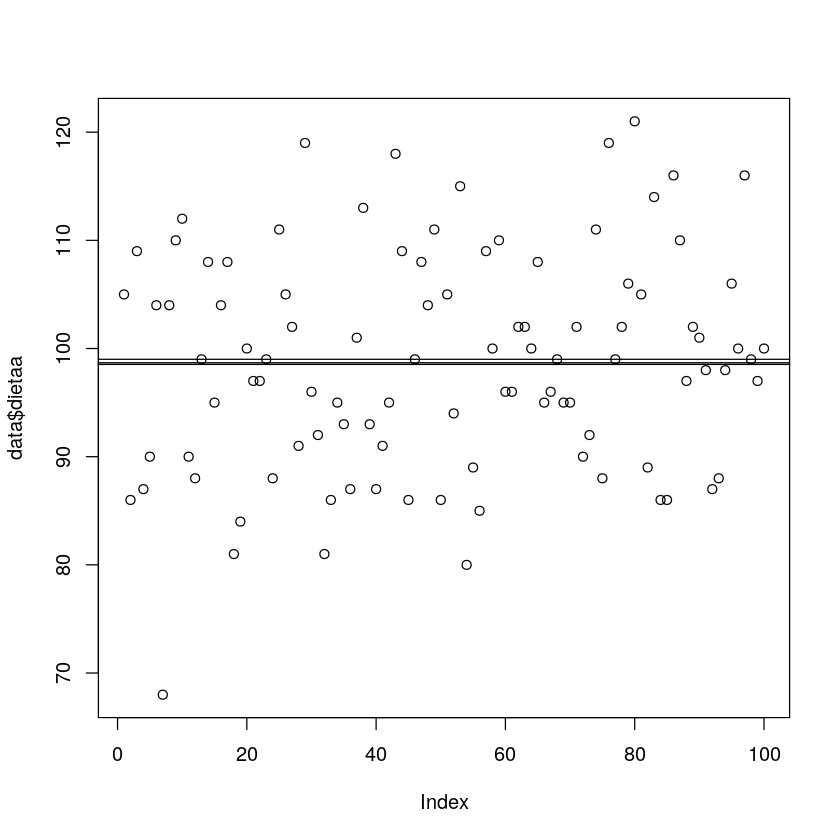

In [18]:

median(data$dietaa)
mean(data$dietaa)
mean(data$dietaa, trim=0.1)
mean(data$dietaa, trim=0.2)
plot(data$dietaa)
abline(h=median(data$dietaa))
abline(h=mean(data$dietaa))
abline(h=mean(data$dietaa, trim=0.1))
abline(h=mean(data$dietaa, trim=0.2))


[1] 94,5

[1] 94,46

[1] 94,5

[1] 94,4

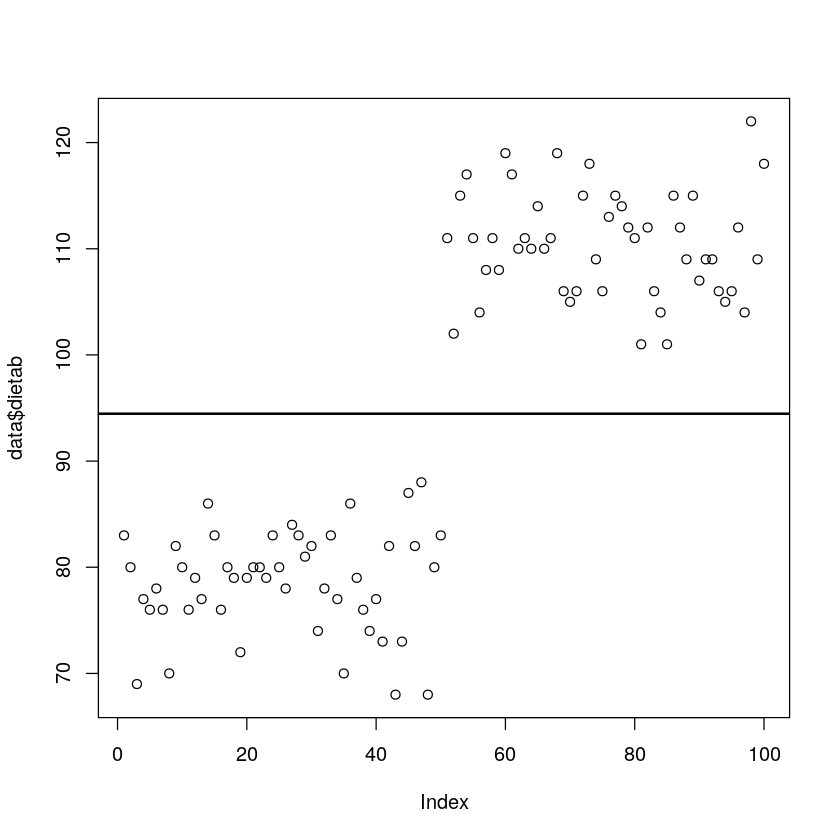

In [11]:
#b

median(data$dietab)
mean(data$dietab)
mean(data$dietab, trim=0.1)
mean(data$dietab, trim=0.2)
plot(data$dietab)
abline(h=median(data$dietab))
abline(h=mean(data$dietab))
abline(h=mean(data$dietab, trim=0.1))
abline(h=mean(data$dietab, trim=0.2))


[1] 73

[1] 77,29

[1] 75,3

[1] 74,5

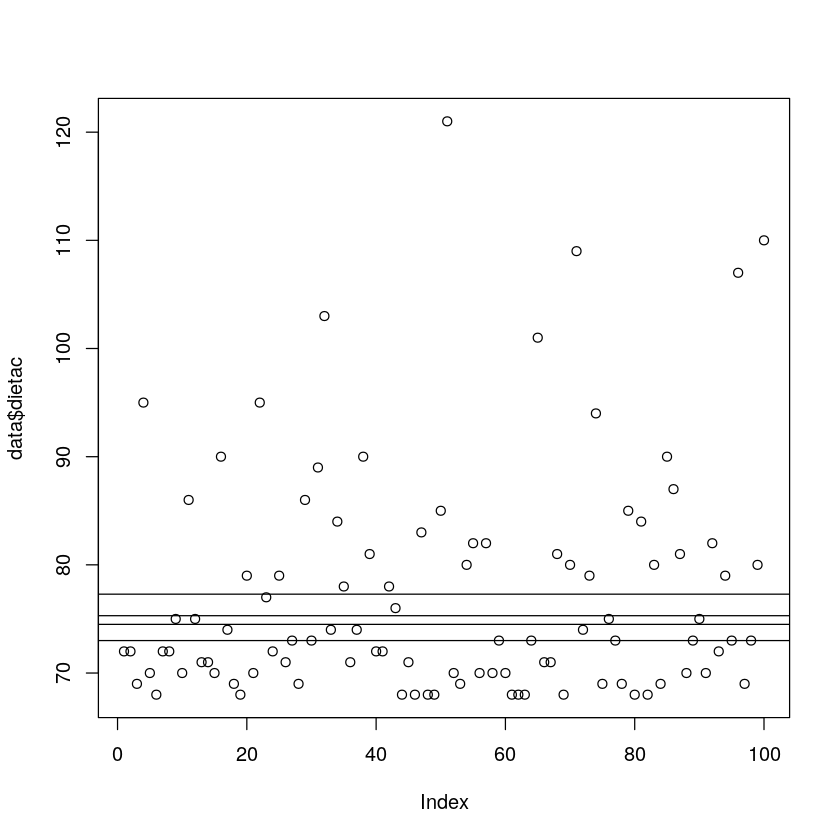

In [12]:
# c

median(data$dietac)
mean(data$dietac)
mean(data$dietac, trim=0.1)
mean(data$dietac, trim=0.2)
plot(data$dietac)
abline(h=median(data$dietac))
abline(h=mean(data$dietac))
abline(h=mean(data$dietac, trim=0.1))
abline(h=mean(data$dietac, trim=0.2))


In [13]:
### (C)
sd(data$dietaa)
IQR(data$dietaa)
mad(data$dietaa)

sd(data$dietab)
IQR(data$dietab)
mad(data$dietab)

sd(data$dietac)
IQR(data$dietac)
mad(data$dietac)


[1] 10,18404

[1] 14,5

[1] 11,1195

[1] 16,74552

[1] 31,25

[1] 22,9803

[1] 10,58329

[1] 11

[1] 5,9304

In [14]:
# D)

quantile(data$dietaa, c(0.10,0.25,0.50,0.75,0.90))
quantile(data$dietab, c(0.10,0.25,0.50,0.75,0.90))
quantile(data$dietac, c(0.10,0.25,0.50,0.75,0.90))


10%    25%    50%    75%    90% 
 86,00  90,75  99,00 105,25 111,10

10%    25%    50%    75%    90% 
 75,80  79,00  94,50 110,25 115,00

10% 25% 50% 75% 90% 
 68  70  73  81  90

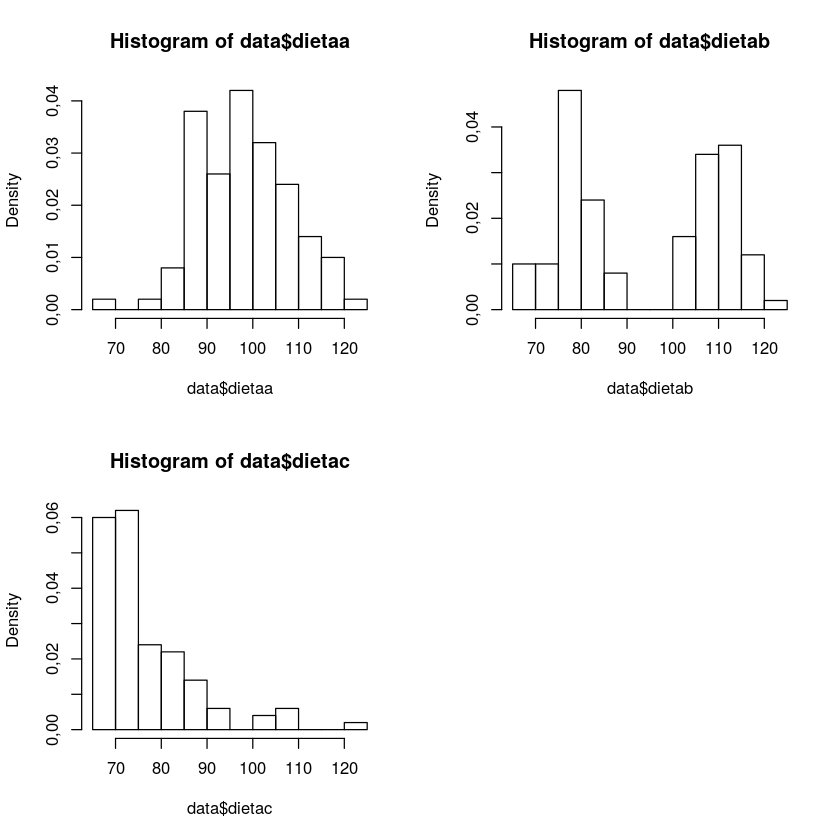

In [19]:
# E)
par(mfrow=c(2,2))
hist(data$dietaa, freq=FALSE)
hist(data$dietab, freq=FALSE)
hist(data$dietac, freq=FALSE)


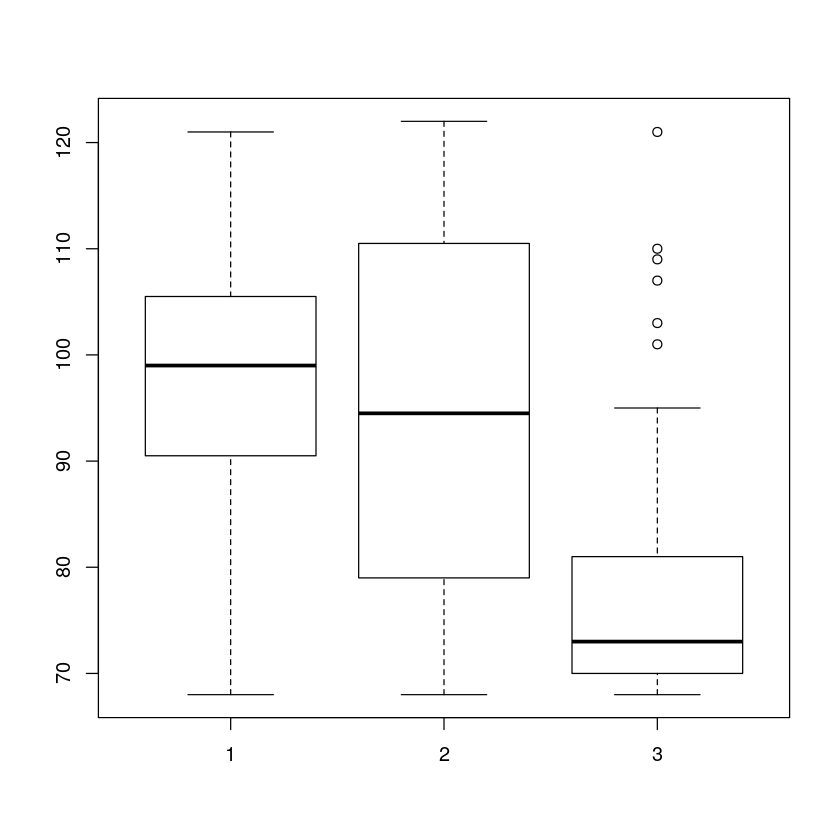

In [22]:
# F)
boxplot(data$dietaa, data$dietab, data$dietac)

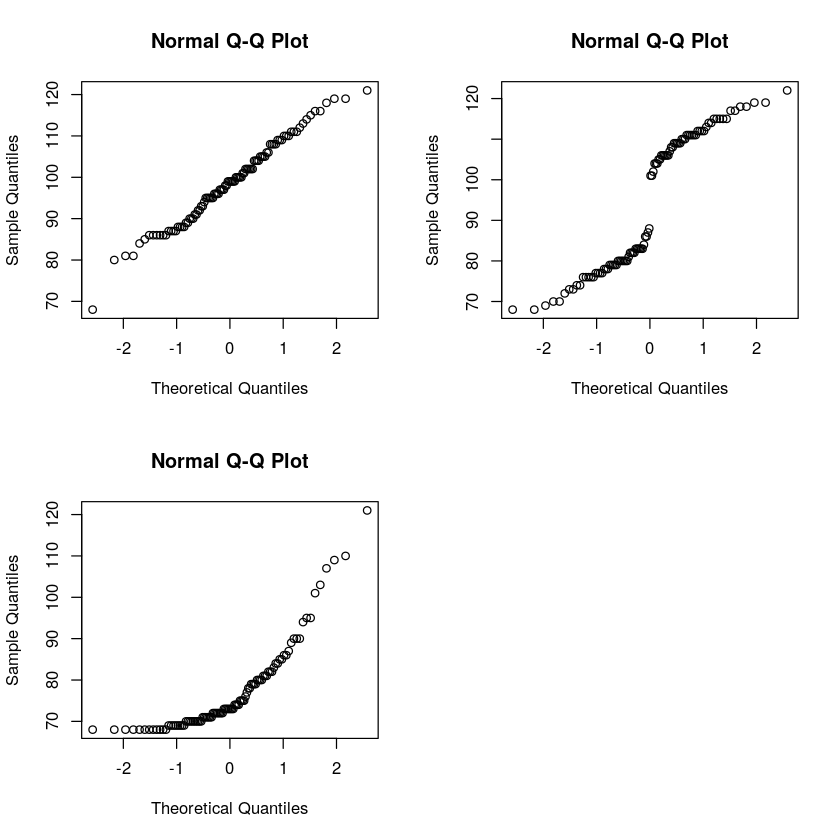

In [23]:
# G)
par(mfrow=c(2,2))
qqnorm(data$dietaa)
qqnorm(data$dietab)
qqnorm(data$dietac)

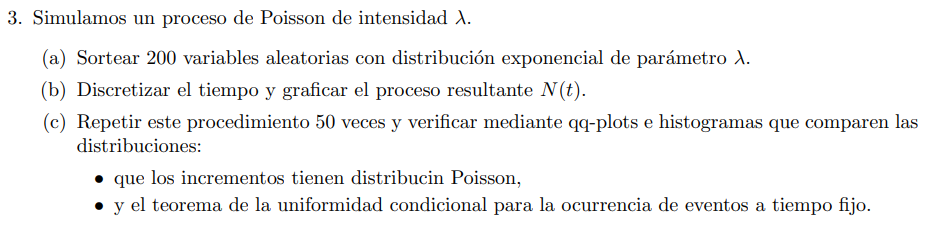

In [1]:
# 3) a)
cant <- 200
lambda <- 4
exponenciales <- rexp(cant, lambda)
t <- numeric(cant)
for(i in 1:cant){
  # discretizamos tiempos suma de exponenciales
  t[i] <- sum(exponenciales[1:i])
}

In [7]:
# b)
par(mfrow=c(2,2))
# dos formas de pensarlo:
# 1. ____________
# 2. contar eventos de cada proceso contra el total

procesoPoissonEnT <- function(tiempo){
  j <- 1
  while(t[j] < tiempo){
    j <- j+1
  }
  respuesta_para_un_t <- j-1
  return(respuesta_para_un_t)
}

procesoPoisson <- function(){
  Nt <- integer(50)
  #tiempo <- 1
  for(tiempo in seq(1, 50, 1)){
    Nt[tiempo] <- procesoPoissonEnT(tiempo)
  }
  return (Nt)
}

Nt <- procesoPoisson()
Nt
plot(Nt)
hist(Nt)

experimentos3 <- numeric(50)*0
for(e in c(1:50)){
  experimentos3[e] <- experimentos3[e] + procesoPoisson()
}
experimentos3 <- experimentos3 / 50
hist(experimentos3)
plot(experimentos3)




ERROR: Error in while (t[j] < tiempo) {: missing value where TRUE/FALSE needed


ERROR: Error in data.frame(x = 1:50, y = 1:46): arguments imply differing number of rows: 50, 46
